In [1]:
import pandas as pd

df = pd.read_parquet('../data/parquet/dataset_size_info.parquet')

# drop null and clean dataframe
df = df.dropna()
df = df[df['dsize'] > 0.]
df = df[df['nfiles'] > 0]
df = df[df['devts'] > 0]

for word in ['BUNNIES', 'Commissioning', 'RelVal']:
    df = df[~df['d_dataset'].str.contains(word)]

df.head(None)


,d_dataset,dsize,nfiles,devts,tier
0,/w1j_300ptw800_alpgen-alpgen/CMSSW_1_6_7-CSA07...,1.712772e+11,57,56662,RECO
1,/rs1gg_1250GeV_c001/CMSSW_1_6_0-CSA07-2799/GEN...,3.885736e+10,21,20412,GEN-SIM-DIGI-RAW
2,/mcatnloWWte/CMSSW_1_4_6-CSA07-2368/GEN-SIM,6.098052e+09,7,17274,GEN-SIM
3,/comphep-bbll/CMSSW_1_4_5-CSA07-1185019773/GEN,1.783459e+12,680,68000000,GEN
4,/bprimecWtW_225GeV/CMSSW_1_6_7-CSA07-3757/GEN-...,4.957051e+10,21,20300,GEN-SIM-DIGI-RAW
...,...,...,...,...,...
1271116,/ZeroBias12/Tier0_REPLAY_2021-PromptReco-v2110...,2.214283e+09,1,961835,AOD
1271117,/ZPrimeToTT_M1200_W360_TuneCP2_13TeV-madgraph-...,3.257134e+10,19,473000,MINIAODSIM
1271118,/HToZATo2L2B_MH-800p00_MA-700p00_tb-20p00_Tune...,1.417517e+10,4,30000,AODSIM
1271119,/ZDfD_ZDtofD1decay_MZD91p1876_MfD15_MfD22_Tune...,1.651916e+07,1,12000,NANOAODSIM


In [2]:
datatiers = ['RAW', 'RECO', 'RAW-RECO', 'GEN-SIM',
             'GEN-SIM-RAW', 'GEN-SIM-RECO', 'ALCARECO',
             'USER', 'GEN-SIM-DIGI-RAW',
             'AOD', 'MINIAOD', 'AODSIM', 'MINIAODSIM']
df['tier'] = df['tier'].apply(
    lambda dtier: dtier if dtier in datatiers else 'Other')

datatier_to_totsize = {tier: dframe['dsize'].sum()
                       for tier, dframe in df.groupby('tier')}


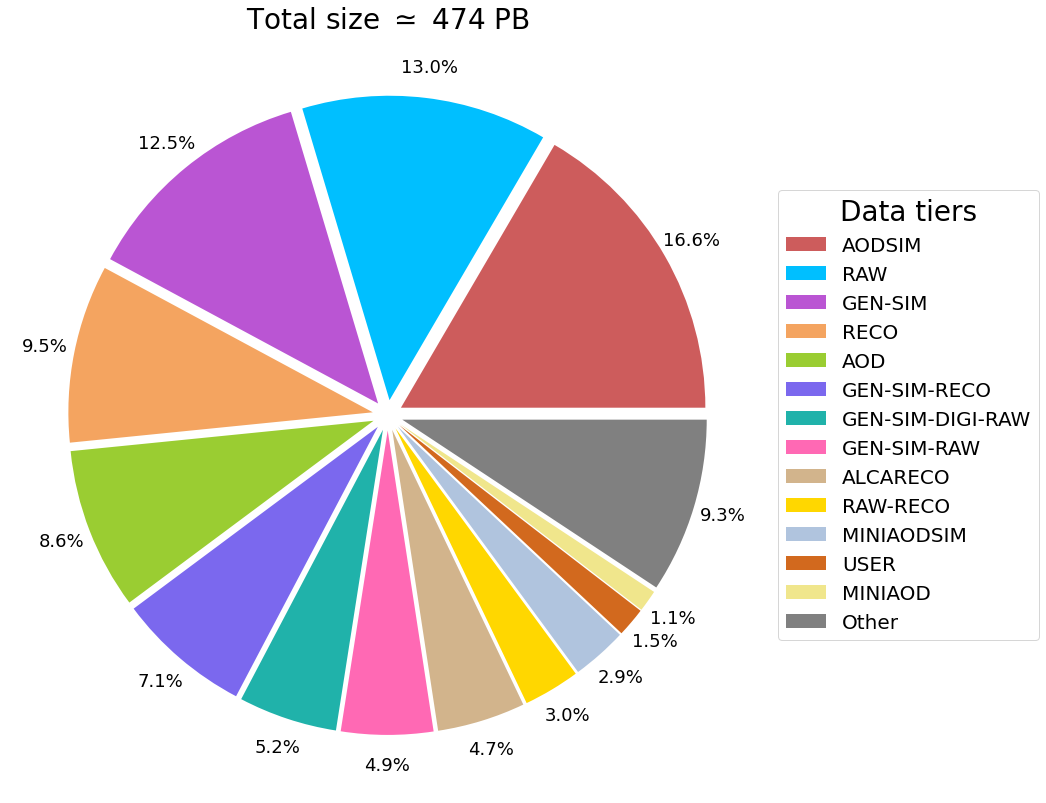

In [3]:
import pylab as plt
from cmSim.tools import plotting

# get sorted datatiers
datatiers = sorted(datatier_to_totsize,
                   key=datatier_to_totsize.get, reverse=True)
datatiers.remove('Other')
datatiers = datatiers + ['Other']

# get pie slices and colors
sizes = [datatier_to_totsize[tier] for tier in datatiers]
colors = plotting.get_custom_colors(datatiers, groups='datatiers')

fig, ax = plt.subplots(figsize=(14, 14))
ax.pie(sizes, labels=datatiers, colors=colors, explode=[0.05]*len(sizes), normalize=True,
       autopct='%1.1f%%', pctdistance=1.1, textprops={'fontsize': 18}, labeldistance=None)
totsize = round(df['dsize'].sum() / 1e15)
ax.set_title(f'Total size $\simeq$ {totsize} PB', fontsize=28)
ax.legend(title='Data tiers', title_fontsize=28, loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=20)
fig.set_facecolor('white')

plt.show()


In [4]:
# filter out datasets never appearing on T1/T2 disk
datasets_names = set(pd.read_parquet(
    './../data/parquet/dataset_site_info.parquet')['dataset_name'])
df = df[df['d_dataset'].isin(datasets_names)]

# consider only main datatiers
datatiers = ['RAW', 'RECO', 'AOD', 'MINIAOD', 'AODSIM', 'MINIAODSIM']
df = df[df['tier'].isin(datatiers)]

df.head(None)


,d_dataset,dsize,nfiles,devts,tier
415,/Mu/Run2010B-Apr21ReReco-v1/RECO,1.200749e+13,3844,32378607,RECO
761,/MinBias_TuneZ2star_Castor_7TeV_pythia6/Summer...,3.397343e+10,12,500000,AODSIM
926,/EtabToJpsiJpsi_8TeV-pythia6-evtgen/Summer12_D...,1.495868e+11,46,499741,AODSIM
948,/TTH_HToGG_M-140_8TeV-pythia6/Summer12_DR53X-P...,3.682396e+10,16,100206,AODSIM
974,/GluGluToHToWWToLAndTau2NuQQ_M-550_8TeV-minloH...,1.477186e+11,48,397947,AODSIM
...,...,...,...,...,...
1270571,/VBFHHTo2V2Tau_CV_0_5_C2V_1_C3_1_dipoleRecoilO...,2.480734e+10,22,399993,MINIAODSIM
1270581,/Spin0ToBB_2j_scalar_g1_M350_pT300_TuneCP5_13T...,2.428062e+10,31,400699,MINIAODSIM
1270582,/VLLSinglet_M-800_13TeV_TuneCP5-pythia8-madgra...,5.924883e+09,7,100000,MINIAODSIM
1270597,/SeesawTypeIII_M-400_1mu1tau_13TeV-TuneCP5-mad...,1.945286e+10,14,400000,MINIAODSIM


In [5]:
datatier_to_evtsize = {dtier: dframe['dsize'].to_numpy() / dframe['devts'].to_numpy()
                       for dtier, dframe in df.groupby('tier')}
data = [datatier_to_evtsize[dtier] for dtier in datatiers]


In [6]:
datatier_to_expectation = {'RAW': 1e6,
                           'RECO': 3e6,
                           'AOD': 4.8e5,
                           'MINIAOD': 4.5e4,
                           'AODSIM': 4.8e5,
                           'MINIAODSIM': 4.5e4}
expected = [datatier_to_expectation[dtier] for dtier in datatiers]


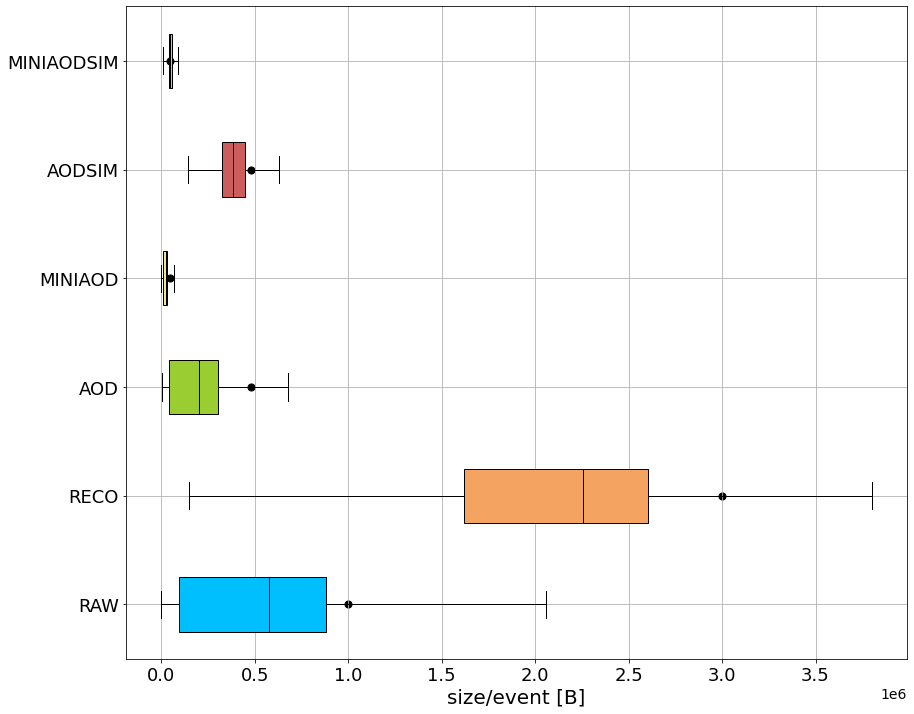

In [7]:
colors = plotting.get_custom_colors(datatiers, groups='datatiers')

fig, ax = plt.subplots(figsize=(14, 12))
boxplot = ax.boxplot(data, vert=False, patch_artist=True,
                     medianprops=dict(color='black'),
                     showfliers=False)
for i, box in enumerate(boxplot['boxes']):
    box.set(facecolor=colors[i])
    ax.scatter(expected[i], i+1, s=50, c='black', marker='o')
ax.set_xlabel('size/event [B]', fontsize=20)
ax.set_yticks(range(1, len(datatiers)+1))
ax.set_yticklabels(datatiers)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.xaxis.offsetText.set_fontsize(14)
ax.grid('dotted')
fig.set_facecolor('white')

plt.show()
